# Apply LSTM on Donors Choose

# 1. Loading and Preprocessing

## 1.1 Loading Data and Splitting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown --id 1HcuqSNQg60HhHhj8z5neZxkzwE2miwuD
!gdown --id 1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-
!gdown --id 1pGd5tLwA30M7wkbJKdXHaae9tYVDICJ_

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1HcuqSNQg60HhHhj8z5neZxkzwE2miwuD
To: /content/resources.csv
100% 127M/127M [00:00<00:00, 129MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-
To: /content/preprocessed_data.csv
100% 124M/124M [00:01<00:00, 118MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
Fro

In [ ]:
import pandas as pd 
import numpy as np
import tensorflow as tf

In [ ]:
data = pd.read_csv('preprocessed_data.csv')
print(data.shape)
data.head()

(109248, 9)


,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [ ]:
#check for any missing values
data.isnull().sum()

school_state                                    0
teacher_prefix                                  0
project_grade_category                          0
teacher_number_of_previously_posted_projects    0
project_is_approved                             0
clean_categories                                0
clean_subcategories                             0
essay                                           0
price                                           0
dtype: int64

In [ ]:
#check for duplciates
dupes = data.duplicated()
print('Number of Duplicate Records found:', dupes.sum())
dupes_idx_ls = [idx for idx, x in enumerate(dupes.where(dupes==True)) if x==True]

Number of Duplicate Records found: 109


In [ ]:
#lets look at a few duplicate records
data.iloc[dupes_idx_ls[:6], :]

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
4699,sc,mr,grades_3_5,18,1,math_science,appliedsciences mathematics,hello i teach great group students eager learn...,344.00
4703,sc,mr,grades_3_5,18,1,math_science,appliedsciences mathematics,hello i teach great group students eager learn...,344.00
4705,sc,mr,grades_3_5,18,1,math_science,appliedsciences mathematics,hello i teach great group students eager learn...,344.00
4706,sc,mr,grades_3_5,18,1,math_science,appliedsciences mathematics,hello i teach great group students eager learn...,344.00
6004,il,mrs,grades_6_8,85,1,math_science,health_lifescience,i teach middle school science large illinois e...,6.99
7254,ak,mr,grades_9_12,28,1,literacy_language,literature_writing,my students live rural fishing village alaska ...,10.62


In [ ]:
#dropping duplicates 
data.drop_duplicates(inplace=True, ignore_index=True)

In [ ]:
print(data.shape)
data.tail()

(109139, 9)


,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
109134,hi,mrs,grades_9_12,5,1,health_sports,teamsports,our day starts 100 students athletes low incom...,143.36
109135,nm,ms,grades_prek_2,3,1,appliedlearning,earlydevelopment other,my students range age four five years old atte...,268.57
109136,il,mrs,grades_3_5,0,1,math_science,appliedsciences environmentalscience,we title 1 school 650 total students our eleme...,399.00
109137,hi,mrs,grades_9_12,1,1,math_science,health_lifescience,i teach many different types students my class...,287.73
109138,ca,mrs,grades_prek_2,2,1,literacy_language,literacy literature_writing,my first graders eager learn world around they...,5.50


In [ ]:
#checking class distribution
data['project_is_approved'].value_counts(normalize=True)

1    0.848432
0    0.151568
Name: project_is_approved, dtype: float64

In [ ]:
X = data.drop(columns = ['project_is_approved'])
y = data['project_is_approved']

In [ ]:
# perform stratified train test split on the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=42)

## 1.2 Text Vectorization

In [ ]:
#since the data is already preprocessed, we can directly move to vectorization part
#first we will vectorize the text data
#for vectorization of text data in deep learning we use tokenizer, you can go through below references
# https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html
#https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do
# after text vectorization you should get train_padded_docs and test_padded_docs

In [ ]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#fit the tokenizer to the text feature 
top_words = 30000
tok = Tokenizer(num_words = top_words, oov_token = '<OOV>') 
tok.fit_on_texts(X_train['essay'])

#word_index returns a dictionary of all the unique words in the corpus ranked in the descendinng order of their occurence 
word_index = tok.word_index #len(word_index) = 50337

#convert the texts to numerical sequences 
train_essay_seq = tok.texts_to_sequences(X_train['essay'])
test_essay_seq = tok.texts_to_sequences(X_test['essay'])

In [ ]:
#get the length of longest sequence 
maxlen_1 = max([len(x) for x in train_essay_seq]) 

#use the max length for padding/truncating s.t. length of all sequences are equal 
train_essay_padded_1 = pad_sequences(train_essay_seq, maxlen = maxlen_1, padding='pre', truncating='post')
test_essay_padded_1 = pad_sequences(test_essay_seq, maxlen = maxlen_1, padding='pre', truncating='post')

In [ ]:
#after getting the padded_docs you have to use predefined glove vectors to get 300 dim representation for each word
# we will be storing this data in form of an embedding matrix and will use it while defining our model
# Please go through following blog's 'Example of Using Pre-Trained GloVe Embedding' section to understand how to create embedding matrix
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

import pickle
with open('/content/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words = set(model.keys())

In [ ]:
#create the weight matrix for embedding layer using glove vectors
vocab_1 = list(word_index.items())[:top_words]
embedding_mat_1 = np.zeros(shape=(top_words+1,300))

for word, idx in vocab_1:
    word_vec = model.get(word)
    if word_vec is not None: 
        embedding_mat_1[idx] = word_vec

In [ ]:
#check shape of padded sequences
train_essay_padded_1.shape, test_essay_padded_1.shape

((81854, 339), (27285, 339))

In [ ]:
#check shape of weights matrix
embedding_mat_1.shape 

(30001, 300)

## 1.3 Categorical feature Vectorization

In [ ]:
# for model 1 and model 2, we have to assign a unique number to each feature in a particular categorical column.
# you can either use tokenizer,label encoder or ordinal encoder to perform the task
# label encoder gives an error for 'unseen values' (values present in test but not in train)
# handle unseen values with label encoder - https://stackoverflow.com/a/56876351
# ordinal encoder also gives error with unseen values but you can use modify handle_unknown parameter
# documentation of ordianl encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
# after categorical feature vectorization you will have column_train_data and column_test_data.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

def encode(feat):
    enc = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1)
    train_feat = enc.fit_transform(X_train[feat].values.reshape(-1,1))
    test_feat = enc.transform(X_test[feat].values.reshape(-1,1))
    return train_feat, test_feat

In [ ]:
cat_cols = ['school_state', 'teacher_prefix', 'project_grade_category', 'clean_categories', 'clean_subcategories']

train_school_state_enc, test_school_state_enc = encode(cat_cols[0])
train_teacher_prefix_enc, test_teacher_prefix_enc = encode(cat_cols[1])
train_project_grade_category_enc, test_project_grade_category_enc = encode(cat_cols[2])
train_clean_categories_enc, test_clean_categories_enc =  encode(cat_cols[3])
train_clean_subcategories_enc, test_clean_subcategories_enc = encode(cat_cols[4])

In [ ]:
#check shape of encoded features 
train_school_state_enc.shape, test_school_state_enc.shape

((81854, 1), (27285, 1))

## 1.4 Numerical feature Vectorization

In [ ]:
# you have to standardise the numerical columns
# stack both the numerical features
#after numerical feature vectorization you will have numerical_data_train and numerical_data_test

In [ ]:
from sklearn.preprocessing import Normalizer
def normalize(feat):
    norm = Normalizer()
    train_feat = norm.fit_transform(X_train[feat].values.reshape(1,-1))
    l2_norm = np.sqrt(sum((X_train['price'].values)**2))
    test_feat = (X_test['price'].values)/l2_norm
    return train_feat.reshape(-1,1), test_feat.reshape(-1,1)

In [ ]:
num_cols = ['teacher_number_of_previously_posted_projects', 'price']

train_num_prev_posted_norm, test_num_prev_posted_norm = normalize(num_cols[0])
train_price_norm, test_price_norm = normalize(num_cols[1])

In [ ]:
#stacking the numerical features horizontally
train_num_feat = np.hstack([train_num_prev_posted_norm,train_price_norm])
test_num_feat = np.hstack([test_num_prev_posted_norm,test_price_norm])

In [ ]:
#check shape of final numerical features matrix 
train_num_feat.shape, test_num_feat.shape

((81854, 2), (27285, 2))

## 1.5 Creating Class Weight Dictionary

In [ ]:
#class weight 
class_w_dict = {}
num_samples = len(y_train)
num_classes = 2
samples_per_class = np.bincount(y_train)
for i in range(2):
    class_w_dict[i] = num_samples/(num_classes*samples_per_class[i])

In [ ]:
class_w_dict

{0: 3.298968241173626, 1: 0.5893186268863034}

## 2. Trying out Different Model Architectures

## <font color='red'> 2.1 Model-1 </font>

<img src='https://i.imgur.com/w395Yk9.png'>

- __Input_seq_total_text_data__ --- Give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 

In [ ]:
#check if gpu is active 
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!nvidia-smi

Thu Jun 30 22:30:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    26W /  70W |    264MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Conv1D, Flatten, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras import callbacks
import os
import datetime

In [ ]:
%load_ext tensorboard 

## 2.1.1 Writing Callbacks 


We use the below approach to calculate ROC-AUC during training which gives us more control over the callbacks to manipulate as per the value of ROC-AUC during training. However, this is measured per batch unlike the first approach which calculate ROC-AUC at the end of eapoch. But if batch size is big it provides good approximation.

In [ ]:
# https://stackoverflow.com/a/46844409 - custom AUC reference 1
# https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807  - custom AUC reference 2
import tensorflow as tf
from sklearn.metrics import roc_auc_score
def auc_roc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.float32)

In [ ]:
#monitor ROC-AUC score and control the callback functions accordingly
checkpoint_cb_dict = {}

for i in range (1,4):
    path = f'checkpoints_model_{i}' + '/weights-{epoch:02d}-{val_auc_roc:.4f}.hdf5'
    checkpoint_cb_dict[i] = callbacks.ModelCheckpoint(filepath = path, monitor = 'val_auc_roc', 
                                                save_best_only=True, verbose=0, mode='max')
    
earlystop_callback = callbacks.EarlyStopping(monitor='val_auc_roc', min_delta=0.0001, 
                                                   patience=7, verbose=1, mode='max', restore_best_weights=True)

reduce_lr_cb = callbacks.ReduceLROnPlateau(monitor='val_auc_roc', patience = 2, factor = 0.5, mode='max', min_delta = 0.0001, min_lr=1e-7)

tensorboard_cb_dict = {}

for i in range(1,4):
    log_dir = os.path.join(f'logs_model_{i}','fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_cb_dict[i] = callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)

In [ ]:
callbacks_1 = [checkpoint_cb_dict[1], earlystop_callback, tensorboard_cb_dict[1], reduce_lr_cb]

## 2.1.2 Model Architecture

In [ ]:
#model layer parameter values
pad_length = maxlen_1
vocab_len = len(vocab_1)
unique_states = len(data['school_state'].unique())
unique_proj_grades = len(data['project_grade_category'].unique())
unique_teacher_prefix = len(data['teacher_prefix'].unique())
unique_clean_cat = len(data['clean_categories'].unique())
unique_clean_subcat = len(data['clean_subcategories'].unique())

In [ ]:
#determine embedding layer output_dim based on input_dim using below function
def embed_size(num):
    s = min(50, (num+1)//2)
    return s

In [ ]:
#set seed for reproducability
set_random_seed(42)
tf.keras.backend.clear_session()

#building the model 
input_text = Input(shape=(pad_length,))
embed_text = Embedding(input_dim = vocab_len+1, output_dim = 300, input_length=pad_length, weights = [embedding_mat_1], trainable=False)(input_text)
lstm_text = LSTM(100)(embed_text)
flatten_text = Flatten()(lstm_text)


input_school_state = Input(shape=(1,))
embed_school_state = Embedding(input_dim = unique_states, output_dim = embed_size(unique_states), input_length = 1, trainable = True)(input_school_state)
flatten_school_state = Flatten()(embed_school_state)


input_proj_grade = Input(shape=(1,))
embed_proj_grade = Embedding(input_dim = unique_proj_grades, output_dim = embed_size(unique_proj_grades), input_length = 1, trainable = True)(input_proj_grade)
flatten_proj_grade = Flatten()(embed_proj_grade)


input_teacher_prefix = Input(shape=(1,))
embed_teacher_prefix = Embedding(input_dim = unique_teacher_prefix, output_dim = embed_size(unique_teacher_prefix), input_length = 1, trainable = True)(input_teacher_prefix)
flatten_teacher_prefix = Flatten()(embed_teacher_prefix)


input_clean_cat = Input(shape=(1,))
embed_clean_cat = Embedding(input_dim = unique_clean_cat, output_dim = embed_size(unique_clean_cat), input_length = 1, trainable = True)(input_clean_cat)
flatten_clean_cat = Flatten()(embed_clean_cat)


input_clean_subcat = Input(shape=(1,))
embed_clean_subcat = Embedding(input_dim = unique_clean_subcat, output_dim = embed_size(unique_clean_subcat), input_length = 1, trainable = True)(input_clean_subcat)
flatten_clean_subcat = Flatten()(embed_clean_subcat)


input_num_feat = Input(shape=(2,))
dense_num_feat = Dense(128, activation='tanh', kernel_initializer = 'glorot_normal')(input_num_feat)


concat = Concatenate()([flatten_text, flatten_school_state, flatten_proj_grade, flatten_teacher_prefix, flatten_clean_cat, flatten_clean_subcat, dense_num_feat])

dense_1 = Dense(256, activation='tanh', kernel_initializer = 'glorot_normal')(concat)

dropout_1 = Dropout(0.4)(dense_1)

dense_2 = Dense(256, activation='tanh', kernel_initializer = 'glorot_normal')(dropout_1)

dropout_2 = Dropout(0.4)(dense_2)

dense_3 = Dense(512, activation='tanh', kernel_initializer = 'glorot_normal')(dropout_2)

output_layer = Dense(1, activation='sigmoid')(dense_3)


model_1 = Model(inputs = [input_text, input_school_state, input_proj_grade, input_teacher_prefix, input_clean_cat, input_clean_subcat, input_num_feat], 
                outputs=[output_layer])

print(model_1.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 339)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 339, 300)     9000300     ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                              

## 2.1.3 Compiling and fititng your model

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# compile and fit your model
model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) , loss = 'binary_crossentropy', metrics = ['accuracy', auc_roc])

history_1 = model_1.fit(x = [train_essay_padded_1, train_school_state_enc, train_project_grade_category_enc, train_teacher_prefix_enc, 
                        train_clean_categories_enc, train_clean_subcategories_enc, train_num_feat], y = y_train, 
                        validation_data = ([test_essay_padded_1, test_school_state_enc, test_project_grade_category_enc, test_teacher_prefix_enc, 
                                           test_clean_categories_enc, test_clean_subcategories_enc, test_num_feat], y_test), batch_size = 512,
                        epochs = 50, class_weight = class_w_dict, verbose = 2, callbacks = callbacks_1)

Epoch 1/50
160/160 - 20s - loss: 0.6666 - accuracy: 0.6047 - auc_roc: 0.6310 - val_loss: 0.6566 - val_accuracy: 0.6869 - val_auc_roc: 0.7072 - lr: 0.0010 - 20s/epoch - 127ms/step
Epoch 2/50
160/160 - 16s - loss: 0.6168 - accuracy: 0.7134 - auc_roc: 0.7254 - val_loss: 0.6264 - val_accuracy: 0.6900 - val_auc_roc: 0.7343 - lr: 0.0010 - 16s/epoch - 102ms/step
Epoch 3/50
160/160 - 16s - loss: 0.5975 - accuracy: 0.7246 - auc_roc: 0.7515 - val_loss: 0.6893 - val_accuracy: 0.6354 - val_auc_roc: 0.7483 - lr: 0.0010 - 16s/epoch - 101ms/step
Epoch 4/50
160/160 - 16s - loss: 0.5866 - accuracy: 0.7330 - auc_roc: 0.7640 - val_loss: 0.5444 - val_accuracy: 0.7624 - val_auc_roc: 0.7471 - lr: 0.0010 - 16s/epoch - 101ms/step
Epoch 5/50
160/160 - 17s - loss: 0.5746 - accuracy: 0.7413 - auc_roc: 0.7765 - val_loss: 0.4881 - val_accuracy: 0.8093 - val_auc_roc: 0.7492 - lr: 0.0010 - 17s/epoch - 106ms/step
Epoch 6/50
160/160 - 17s - loss: 0.5617 - accuracy: 0.7474 - auc_roc: 0.7877 - val_loss: 0.4829 - val_acc

In [ ]:
res_1 = pd.DataFrame(history_1.history)
res_1

,loss,accuracy,auc_roc,val_loss,val_accuracy,val_auc_roc,lr
0,0.666642,0.604686,0.630986,0.656617,0.686934,0.707243,0.001000
1,0.616769,0.713355,0.725376,0.626351,0.690049,0.734299,0.001000
2,0.597549,0.724558,0.751493,0.689257,0.635441,0.748312,0.001000
3,0.586577,0.733037,0.763973,0.544434,0.762360,0.747143,0.001000
4,0.574637,0.741320,0.776453,0.488132,0.809272,0.749205,0.001000
5,0.561671,0.747367,0.787746,0.482917,0.794136,0.750007,0.001000
6,0.546998,0.755565,0.800621,0.535875,0.752208,0.753747,0.001000
7,0.533210,0.758570,0.814408,0.572339,0.736669,0.746728,0.001000
8,0.512433,0.767769,0.829651,0.546974,0.753967,0.734411,0.001000
9,0.474662,0.786376,0.857057,0.556323,0.743485,0.733567,0.000500


Note: 

- Blue represents Validation Curve
- Orange represents Train Curve

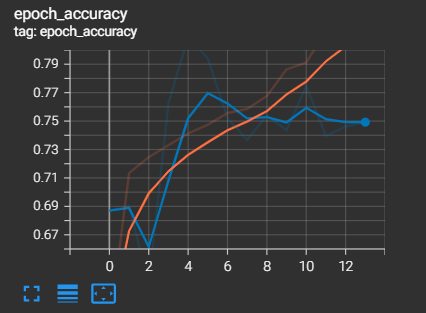

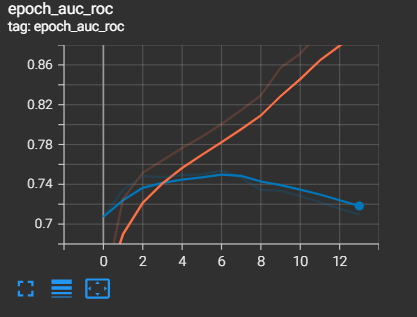

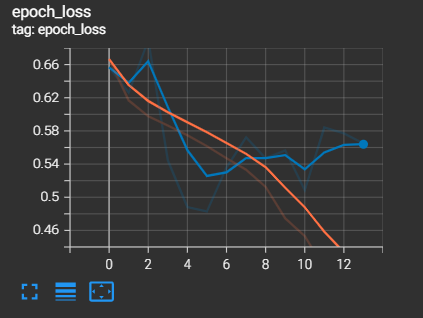

Observations: 

Note: We are referencing first epoch as 0th, second as 1st, and so on.

- Train Accuracy continues to increase every epoch while Val Accuracy starts at a higher value with each epoch it converges towards Train Accuracy. After 5th epoch the Val Accuracy doesn't improve much while the Train Accuracy keeps on improving indicating that the model is overfitting.

- Similarly, Train AUC continues to increase every epoch while Val AUC starts at a higher value with each epoch it converges towards Train AUC. After 6th epoch the Val AUC dips while the Train AUC keeps on improving indicating that the model is overfitting. 

- Train Loss continues to decrease every epoch while Val Loss starts at a lower value with each epoch it converges towards Train Loss. After 5th epoch the Val Loss slowly rises again while the Train Loss keeps on decreasing indicating that the model is overfitting.

- Overall Best Model is achieved at 6th Epoch with performance on Val: Acc=0.752, AUC=0.753, Loss=0.535

# <font color='red'> 2.2 Model-2 </font>

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Fit TF-IDF vectorizer on the Train data
2. Get the idf value for each word we have in the train data. Refer - <a  href='https://stackoverflow.com/questions/23792781/tf-idf-feature-weights-using-sklearn-feature-extraction-text-tfidfvectorizer'>this</a>
3. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very 
frequent words and very very rare words don't give much information.
4.Remove the low idf value and high idf value words from the train and test data. You can go through each of the
sentence of train and test data and include only those features(words) which are present in the defined IDF range.
5. Perform tokenization on the modified text data same as you have done for previous model.
6. Create embedding matrix for model 2 and then use the rest of the features similar to previous model.
7. Define the model, compile and fit the model.
</pre>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
vec.fit(X_train['essay'].values)

#idf values of unique words
idf_vals = vec.idf_

#all the unique words in train essay data
unique_words = vec.get_feature_names_out()

In [ ]:
#analysing idf values
df = pd.DataFrame({'word': unique_words, 'idf': idf_vals})
df.head()

,word,idf
0,00,7.275752
1,000,5.914110
2,000s,11.619557
3,001,11.214092
4,002,11.619557


In [ ]:
df['idf'].describe()

count    50300.000000
mean        10.272662
std          1.815332
min          1.007652
25%          9.604654
50%         11.214092
75%         11.619557
max         11.619557
Name: idf, dtype: float64

- 50% of idf values are >=11.21 of which 25% are all valued 11.61, indicates that 25% of the most rarely occuring words have all occured exactly same number of times.

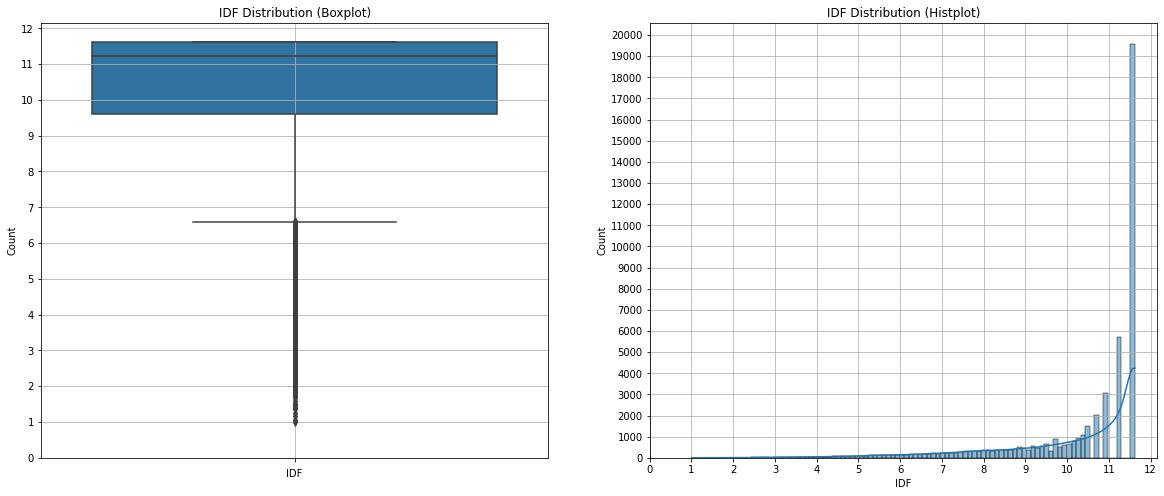

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize = (20,8))

sns.boxplot(y = df['idf'], ax = ax[0])
ax[0].set(xlabel = 'IDF', ylabel = 'Count', title = 'IDF Distribution (Boxplot)')
ax[0].set_yticks(np.arange(0,13))
ax[0].grid()


sns.histplot(data = df, x = 'idf', kde=True, ax = ax[1])
ax[1].set(xlabel = 'IDF', ylabel = 'Count', title = 'IDF Distribution (Histplot)')
ax[1].set_xticks(np.arange(0,13))
ax[1].set_yticks(np.arange(0,21000, 1000))
ax[1].grid()

plt.show()

In [ ]:
percentile_df = pd.DataFrame({'percentile': np.arange(0,100,5), 'values':np.percentile(idf_vals, np.arange(0,100, 5))})
percentile_df

,percentile,values
0,0,1.007652
1,5,6.274834
2,10,7.559114
3,15,8.361461
4,20,9.054608
5,25,9.604654
6,30,10.010120
7,35,10.366795
8,40,10.703267
9,45,10.926410


Observations: 
- About 38% of the unique words in train have the highest idf value 11.61 indicating that these words occur most rarely in the corpus.
- The most frequently occuring words are at the tail end of the histplot with low idf values, which make up for a very small portion of the vocab.  

Conclusion:
- To avoid frequent and rarely occuring words we set our idf range as [2, 11.5) removing about 40% of the words from consideration.

In [ ]:
idf_dict = dict(zip(unique_words, idf_vals))
idf_lower = 2
idf_upper = 11.5 

train_essay_edited = []
test_essay_edited = []

#remove all words out of idf range from the essays 
for essay in X_train['essay'].values:
    in_idf_range = [word for word in essay.split() if (idf_dict.get(word,-1)>=idf_lower and idf_dict.get(word,-1)<idf_upper) or idf_dict.get(word,-1)==-1]
    edited = ' '.join(in_idf_range)
    train_essay_edited.append(edited)

for essay in X_test['essay'].values: 
    in_idf_range = [word for word in essay.split() if (idf_dict.get(word,-1)>=idf_lower and idf_dict.get(word,-1)<idf_upper) or idf_dict.get(word,-1)==-1]
    edited = ' '.join(in_idf_range)
    test_essay_edited.append(edited)

In [ ]:
#check edited essays
train_essay_edited[0]

'diverse backgrounds parents south america central america these ready explore different exciting things due limited resources home exposed things a lot low income households one working parent single parent households one thing sure no matter background always eager having mobile technology allows go lot activities always inside having technology allow feel empowered keep engaged so far i found making movie trailers sparked interest parents get involved child parents student engagement helps making stick'

In [ ]:
#check edited essays
test_essay_edited[0]

'5th 6th combination northern california k 8 title i over 80 free reduced breakfast lunch programs i fortunate working group playful curious self motivated as group quite variety ability levels experiences however collaboration willingness gift everyone project continue foster rich experiences science technology engineering art math getting started maker movement working paper constructions e paper tubes masking tape folded paper creations ready integrate electronics maker space with new supplies basic circuitry computer programming design engineering skills in world caught passively consuming products goal inspire kids creators i wish see world canvas ideas find ways express clearly creatively with development steam inspired maker space give kids chance develop creativity confidence'

In [ ]:
tok = Tokenizer(oov_token='<OOV>') 
tok.fit_on_texts(train_essay_edited) 
word_index = tok.word_index #len(word_index) = 30722

In [ ]:
train_essay_seq = tok.texts_to_sequences(train_essay_edited)
test_essay_seq = tok.texts_to_sequences(test_essay_edited)

In [ ]:
maxlen_2 = max([len(x) for x in train_essay_seq])

train_essay_padded_2 = pad_sequences(train_essay_seq, maxlen = maxlen_2, padding ='pre', truncating = 'post') 
test_essay_padded_2 = pad_sequences(test_essay_seq, maxlen = maxlen_2, padding ='pre', truncating = 'post')

In [ ]:
vocab_2 = list(word_index.items())
embedding_mat_2 = np.zeros(shape=(len(vocab_2)+1,300))
for word, idx in vocab_2:
    word_vec = model.get(word)
    if word_vec is not None: 
        embedding_mat_2[idx] = word_vec

In [ ]:
embedding_mat_2.shape

(30723, 300)

## 2.2.1 Callbacks

In [ ]:
callbacks_2 = [checkpoint_cb_dict[2], earlystop_callback, tensorboard_cb_dict[2], reduce_lr_cb]

## 2.2.2 Building Model Architecture

In [ ]:
pad_length = maxlen_2
vocab_len = len(vocab_2)
unique_states = len(data['school_state'].unique())
unique_proj_grades = len(data['project_grade_category'].unique())
unique_teacher_prefix = len(data['teacher_prefix'].unique())
unique_clean_cat = len(data['clean_categories'].unique())
unique_clean_subcat = len(data['clean_subcategories'].unique())

In [ ]:
set_random_seed(42)
tf.keras.backend.clear_session()

#building the model 
input_text = Input(shape=(pad_length,))
embed_text = Embedding(input_dim = vocab_len+1, output_dim = 300, input_length=pad_length, weights = [embedding_mat_2], trainable=False)(input_text)
lstm_text = LSTM(100)(embed_text)
flatten_text = Flatten()(lstm_text)


input_school_state = Input(shape=(1,))
embed_school_state = Embedding(input_dim = unique_states, output_dim = embed_size(unique_states), input_length = 1, trainable = True)(input_school_state)
flatten_school_state = Flatten()(embed_school_state)


input_proj_grade = Input(shape=(1,))
embed_proj_grade = Embedding(input_dim = unique_proj_grades, output_dim = embed_size(unique_proj_grades), input_length = 1, trainable = True)(input_proj_grade)
flatten_proj_grade = Flatten()(embed_proj_grade)


input_teacher_prefix = Input(shape=(1,))
embed_teacher_prefix = Embedding(input_dim = unique_teacher_prefix, output_dim = embed_size(unique_teacher_prefix), input_length = 1, trainable = True)(input_teacher_prefix)
flatten_teacher_prefix = Flatten()(embed_teacher_prefix)


input_clean_cat = Input(shape=(1,))
embed_clean_cat = Embedding(input_dim = unique_clean_cat, output_dim = embed_size(unique_clean_cat), input_length = 1, trainable = True)(input_clean_cat)
flatten_clean_cat = Flatten()(embed_clean_cat)


input_clean_subcat = Input(shape=(1,))
embed_clean_subcat = Embedding(input_dim = unique_clean_subcat, output_dim = embed_size(unique_clean_subcat), input_length = 1, trainable = True)(input_clean_subcat)
flatten_clean_subcat = Flatten()(embed_clean_subcat)


input_num_feat = Input(shape=(2,))
dense_num_feat = Dense(64, activation='tanh', kernel_initializer = 'glorot_normal')(input_num_feat)


concat = Concatenate()([flatten_text, flatten_school_state, flatten_proj_grade, flatten_teacher_prefix, flatten_clean_cat, flatten_clean_subcat, dense_num_feat])

dense_1 = Dense(256, activation='tanh', kernel_initializer = 'glorot_normal')(concat)

dropout_1 = Dropout(0.4)(dense_1)

dense_2 = Dense(256, activation='tanh', kernel_initializer = 'glorot_normal')(dropout_1)

dropout_2 = Dropout(0.4)(dense_2)

dense_3 = Dense(512, activation='tanh', kernel_initializer = 'glorot_normal')(dropout_2)

output_layer = Dense(1, activation='sigmoid')(dense_3)


model_2 = Model(inputs = [input_text, input_school_state, input_proj_grade, input_teacher_prefix, input_clean_cat, input_clean_subcat, input_num_feat], 
                outputs=[output_layer])

print(model_2.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 300, 300)     9216900     ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                              

## 2.2.3 Compiling and fititng your model

In [ ]:
# compile and fit your model
model_2.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ['accuracy', auc_roc])

history_2 = model_2.fit(x = [train_essay_padded_2, train_school_state_enc, train_project_grade_category_enc, train_teacher_prefix_enc, 
                        train_clean_categories_enc, train_clean_subcategories_enc, train_num_feat], y = y_train, 
                        validation_data = ([test_essay_padded_2, test_school_state_enc, test_project_grade_category_enc, test_teacher_prefix_enc, 
                                           test_clean_categories_enc, test_clean_subcategories_enc, test_num_feat], y_test), batch_size=512,
                        epochs = 50, class_weight = class_w_dict, verbose = 2, callbacks = callbacks_2)

Epoch 1/50
160/160 - 18s - loss: 0.6605 - accuracy: 0.6063 - auc_roc: 0.6462 - val_loss: 0.6517 - val_accuracy: 0.6415 - val_auc_roc: 0.7118 - lr: 0.0010 - 18s/epoch - 116ms/step
Epoch 2/50
160/160 - 16s - loss: 0.6115 - accuracy: 0.7108 - auc_roc: 0.7306 - val_loss: 0.6170 - val_accuracy: 0.6861 - val_auc_roc: 0.7373 - lr: 0.0010 - 16s/epoch - 99ms/step
Epoch 3/50
160/160 - 16s - loss: 0.5931 - accuracy: 0.7215 - auc_roc: 0.7551 - val_loss: 0.6799 - val_accuracy: 0.6268 - val_auc_roc: 0.7446 - lr: 0.0010 - 16s/epoch - 100ms/step
Epoch 4/50
160/160 - 16s - loss: 0.5813 - accuracy: 0.7285 - auc_roc: 0.7691 - val_loss: 0.5799 - val_accuracy: 0.7235 - val_auc_roc: 0.7483 - lr: 0.0010 - 16s/epoch - 98ms/step
Epoch 5/50
160/160 - 15s - loss: 0.5671 - accuracy: 0.7350 - auc_roc: 0.7837 - val_loss: 0.4898 - val_accuracy: 0.7960 - val_auc_roc: 0.7421 - lr: 0.0010 - 15s/epoch - 97ms/step
Epoch 6/50
160/160 - 14s - loss: 0.5500 - accuracy: 0.7425 - auc_roc: 0.7984 - val_loss: 0.4914 - val_accura

In [ ]:
res_2 = pd.DataFrame(history_2.history)
res_2

,loss,accuracy,auc_roc,val_loss,val_accuracy,val_auc_roc,lr
0,0.660526,0.606323,0.646178,0.651706,0.641488,0.711775,0.001000
1,0.611491,0.710778,0.730562,0.616986,0.686128,0.737310,0.001000
2,0.593094,0.721467,0.755083,0.679909,0.626755,0.744647,0.001000
3,0.581335,0.728468,0.769084,0.579919,0.723474,0.748333,0.001000
4,0.567066,0.734979,0.783678,0.489762,0.795968,0.742138,0.001000
5,0.550050,0.742529,0.798398,0.491445,0.778266,0.736916,0.001000
6,0.515121,0.759767,0.827166,0.611992,0.691332,0.736768,0.000500
7,0.491409,0.770213,0.845147,0.540579,0.748836,0.726134,0.000500
8,0.452805,0.790627,0.870924,0.557535,0.741103,0.717417,0.000250
9,0.429872,0.801256,0.883708,0.573462,0.738135,0.713692,0.000250


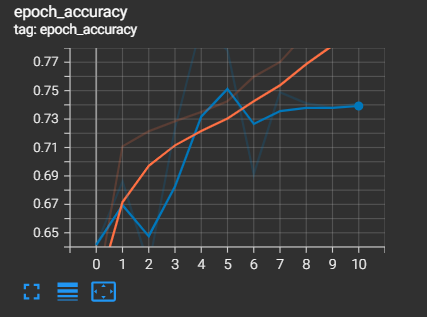

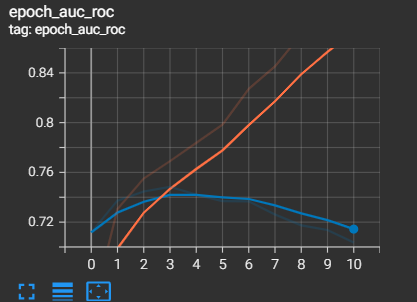

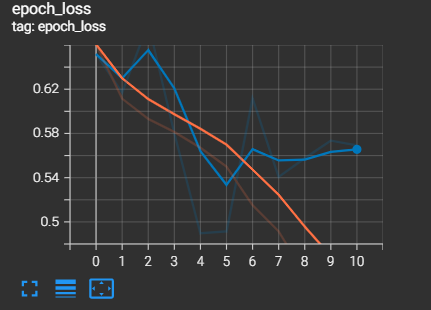

Observations: 

Note: We are referencing first epoch as 0th, second as 1st, and so on.

- Train Accuracy continues to increase every epoch while Val Accuracy starts at a higher value with each epoch it converges towards Train Accuracy. After 5th epoch the Val Accuracy doesn't improve much while the Train Accuracy keeps on improving indicating that the model is overfitting.

- Similarly, Train AUC continues to increase every epoch while Val AUC starts at a higher value with each epoch it converges towards Train AUC. After 3rd epoch the Val AUC dips while the Train AUC keeps on improving indicating that the model is overfitting. 

- Train Loss continues to decrease every epoch while Val Loss starts at a lower value with each epoch it converges towards Train Loss. After 5th epoch the Val Loss slowly rises again while the Train Loss keeps on decreasing indicating that the model is overfitting.

- Overall Best Model is achieved at 3rd Epoch with performance on Val: Acc=0.723, AUC=0.748, Loss=0.58

# <font color='red'>2.3 Model-3 </font>

<img src='https://i.imgur.com/fkQ8nGo.png'>

In [ ]:
#in this model we use the text vectorized data from model1 
#for other than text data consider the following steps
#we perform one hot encoding of categorical features using onehotencoder() 
#stack up standardised numerical features and all the one hot encoded categorical features
#the input to conv1d layer is 3d, we convert 2d data to 3d using np.newaxis

In [ ]:
#categorical one hot encoding 
from sklearn.preprocessing import OneHotEncoder

def ohe(feat):
    enc = OneHotEncoder(handle_unknown='ignore')
    train_feat = enc.fit_transform(X_train[feat].values.reshape(-1,1))
    test_feat = enc.transform(X_test[feat].values.reshape(-1,1)) 
    return train_feat, test_feat

In [ ]:
train_school_state_ohe, test_school_state_ohe = ohe(cat_cols[0])
train_teacher_prefix_ohe, test_teacher_prefix_ohe = ohe(cat_cols[1])
train_project_grade_category_ohe, test_project_grade_category_ohe = ohe(cat_cols[2])
train_clean_categories_ohe, test_clean_categories_ohe = ohe(cat_cols[3])
train_clean_subcategories_ohe, test_clean_subcategories_ohe = ohe(cat_cols[4])

In [ ]:
#stacking categorical and numerical features
train_other_feat = np.hstack([train_school_state_ohe.toarray(),train_teacher_prefix_ohe.toarray(),train_project_grade_category_ohe.toarray(),
                              train_clean_categories_ohe.toarray(),train_clean_subcategories_ohe.toarray(),train_num_feat])
test_other_feat = np.hstack([test_school_state_ohe.toarray(), test_teacher_prefix_ohe.toarray(), test_project_grade_category_ohe.toarray(),
                             test_clean_categories_ohe.toarray(), test_clean_subcategories_ohe.toarray(),test_num_feat])

In [ ]:
#adding a new dimension because Conv1D layer takes 3D inputs
train_other_feat = train_other_feat[:, :, np.newaxis]
test_other_feat = test_other_feat[:, :, np.newaxis]

print(train_other_feat.shape,test_other_feat.shape)

(81854, 506, 1) (27285, 506, 1)


## 2.3.1 Callbacks

In [ ]:
callbacks_3 = [checkpoint_cb_dict[3], earlystop_callback, tensorboard_cb_dict[3], reduce_lr_cb]

## 2.3.2 Building Model Architecture 

In [ ]:
pad_length = maxlen_1
vocab_len = len(vocab_1)

In [ ]:
set_random_seed(42)
tf.keras.backend.clear_session()

#building the model 
input_text = Input(shape=(pad_length,))
embed_text = Embedding(input_dim = vocab_len+1, output_dim = 300, input_length=pad_length, weights = [embedding_mat_1], trainable=False)(input_text)
lstm_text = LSTM(100)(embed_text)
flatten_text = Flatten()(lstm_text)


input_other_feat = Input(shape=(train_other_feat.shape[1], train_other_feat.shape[2]))
conv1D_1 = Conv1D(filters = 64,kernel_size = 3, strides = 1, padding='same', activation='elu', kernel_initializer = 'he_normal')(input_other_feat)
conv1D_2 = Conv1D(filters = 128,kernel_size = 3, strides = 1, padding='same', activation='elu', kernel_initializer = 'he_normal')(conv1D_1)
conv1D_3 = Conv1D(filters = 256,kernel_size = 3, strides = 1, padding='same', activation='elu', kernel_initializer = 'he_normal')(conv1D_2)
flatten_other_feat = Flatten()(conv1D_3)


concat = Concatenate()([flatten_text, flatten_other_feat])

dense_1 = Dense(128, activation='elu', kernel_initializer = 'he_normal')(concat)

dropout_1 = Dropout(0.4)(dense_1)

dense_2 = Dense(256, activation='elu', kernel_initializer = 'he_normal')(dropout_1)

dropout_2 = Dropout(0.4)(dense_2)

dense_3 = Dense(512, activation='elu', kernel_initializer = 'he_normal')(dropout_2)

output_layer = Dense(1, activation='sigmoid')(dense_3)


model_3 = Model(inputs = [input_text, input_other_feat], 
                outputs=[output_layer])

print(model_3.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 506, 1)]     0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 339)]        0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 506, 64)      256         ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 339, 300)     9000300     ['input_1[0][0]']                
                                                                                              

## 2.3.3 Compiling and fitting your model 

In [ ]:
model_3.compile(optimizer = tf.keras.optimizers.Adam(0.001, amsgrad=True) , loss = 'binary_crossentropy', metrics = ['accuracy', auc_roc])

history_3 = model_3.fit(x = [train_essay_padded_1, train_other_feat], y = y_train, 
                        validation_data = ([test_essay_padded_1, test_other_feat], y_test), batch_size=512,
                        epochs = 50, class_weight = class_w_dict, verbose = 2, callbacks = callbacks_3)

Epoch 1/50
160/160 - 57s - loss: 0.7943 - accuracy: 0.5120 - auc_roc: 0.5178 - val_loss: 0.5687 - val_accuracy: 0.7131 - val_auc_roc: 0.6436 - lr: 0.0010 - 57s/epoch - 359ms/step
Epoch 2/50
160/160 - 40s - loss: 0.7052 - accuracy: 0.5637 - auc_roc: 0.5804 - val_loss: 0.5723 - val_accuracy: 0.7170 - val_auc_roc: 0.6845 - lr: 0.0010 - 40s/epoch - 249ms/step
Epoch 3/50
160/160 - 42s - loss: 0.6658 - accuracy: 0.6390 - auc_roc: 0.6590 - val_loss: 0.6243 - val_accuracy: 0.7164 - val_auc_roc: 0.7163 - lr: 0.0010 - 42s/epoch - 260ms/step
Epoch 4/50
160/160 - 40s - loss: 0.6369 - accuracy: 0.6836 - auc_roc: 0.7025 - val_loss: 0.6535 - val_accuracy: 0.6815 - val_auc_roc: 0.7338 - lr: 0.0010 - 40s/epoch - 247ms/step
Epoch 5/50
160/160 - 41s - loss: 0.6208 - accuracy: 0.6981 - auc_roc: 0.7237 - val_loss: 0.5468 - val_accuracy: 0.7532 - val_auc_roc: 0.7426 - lr: 0.0010 - 41s/epoch - 257ms/step
Epoch 6/50
160/160 - 41s - loss: 0.6010 - accuracy: 0.7219 - auc_roc: 0.7458 - val_loss: 0.4591 - val_acc

In [52]:
res_3 = pd.DataFrame(history_3.history)
res_3

,loss,accuracy,auc_roc,val_loss,val_accuracy,val_auc_roc,lr
0,0.794331,0.512046,0.517814,0.568659,0.713066,0.643603,0.001000
1,0.705170,0.563674,0.580439,0.572303,0.716987,0.684496,0.001000
2,0.665846,0.638979,0.659049,0.624288,0.716401,0.716319,0.001000
3,0.636899,0.683644,0.702515,0.653457,0.681473,0.733793,0.001000
4,0.620837,0.698060,0.723713,0.546799,0.753234,0.742605,0.001000
5,0.600997,0.721907,0.745834,0.459108,0.805461,0.751642,0.001000
6,0.589529,0.734161,0.757303,0.522417,0.775078,0.755883,0.001000
7,0.577837,0.742273,0.770645,0.550293,0.760345,0.757542,0.001000
8,0.565679,0.751154,0.781799,0.534988,0.772146,0.756950,0.001000
9,0.554906,0.756848,0.792757,0.571973,0.749973,0.759280,0.001000


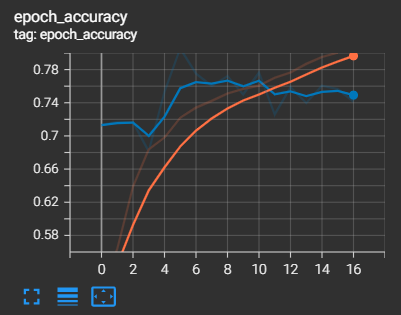

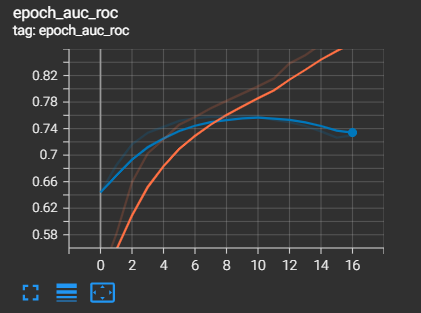

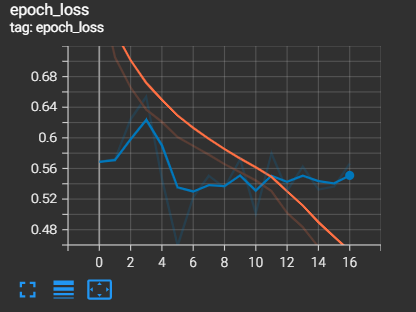

Observations: 

Note: We are referencing first epoch as 0, second as 1, and so on.

- Train Accuracy continues to increase every epoch while Val Accuracy starts at a higher value with each epoch it converges towards Train Accuracy. After 10th epoch the Val Accuracy doesn't improve much while the Train Accuracy keeps on improving indicating that the model is overfitting. 

- Similarly, Train AUC continues to increase every epoch while Val AUC starts at a higher value with each epoch it converges towards Train AUC. After 9th epoch the Val AUC dips while the Train AUC keeps on improving indicating that the model is overfitting. 

- Train Loss continues to decrease every epoch while Val Loss starts at a lower value with each epoch it converges towards Train Loss. After 10th epoch the Val Loss slowly rises again while the Train Loss keeps on decreasing indicating that the model is overfitting.

- Overall Best Model is achieved at 9th Epoch with performance on Val: Acc=0.75, AUC=0.7593, Loss=0.57

# 3. Summary

In [6]:
#Tabulate your results
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "AUC", "Accuracy", "Loss"]
x.add_row(["Model-1", 0.753, 0.752, 0.535])
x.add_row(["Model-2", 0.748, 0.723, 0.58])
x.add_row(["Model-3", 0.759, 0.75, 0.57])

print(x)

+---------+-------+----------+-------+
|  Model  |  AUC  | Accuracy |  Loss |
+---------+-------+----------+-------+
| Model-1 | 0.753 |  0.752   | 0.535 |
| Model-2 | 0.748 |  0.723   |  0.58 |
| Model-3 | 0.759 |   0.75   |  0.57 |
+---------+-------+----------+-------+
